## **Data Science & Business Analytics Internship Task_1: Data Science & Business Analytics Internship**
In this task, we aim to predict students' marks based on the number of hours they studied using simple linear regression, involving two variables. The goal is to build a model that estimates the percentage of marks using study hours as the predictor variable. This task serves to understand the relationship between study time and academic performance, providing foundational knowledge in regression analysis for predicting student scores.


### Task Submittd by: Aditi Marwaha

#### **Importing required libraries**

In [11]:
#Importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### **Reading dataset from the online source**

In [12]:
#importing Dataset from the link provided
Data = pd.read_csv("http://bit.ly/w-data")

In [13]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
# Checking the datatypes and null values
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


##### **The dataset has 25 rows and there are no null values present.**

In [15]:
# Using describe() to check mean, std, count, min, max and percentiles
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### **The above distribution shows that the values are in expected range**

#### **Data Visualization**

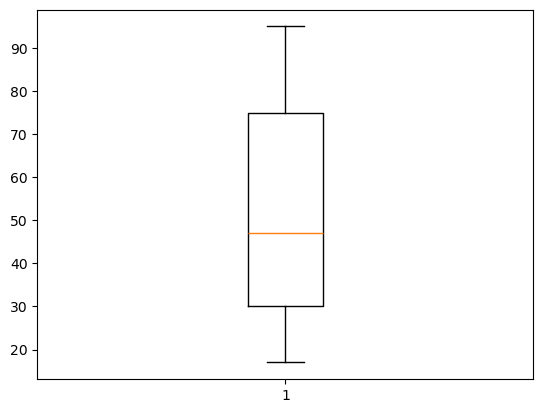

In [17]:
# plotting boxplot to check any outliers
plt.figure(figsize=(5,5))
plt.boxplot(Data["Scores"])
plt.show()

**The boxplot doesn't show any outliers**

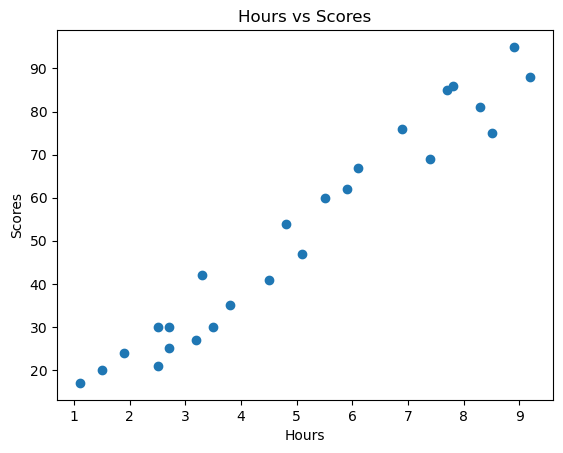

In [16]:
# Plotting the distribution of scores
plt.figure(figsize=(5,4))
plt.scatter(Data['Hours'], Data['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

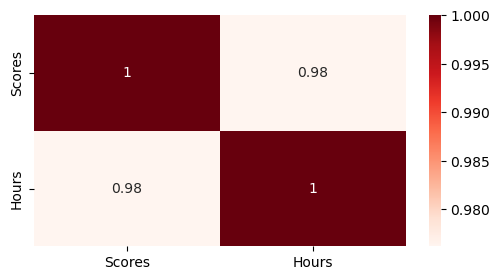

In [19]:
# Plotting heatmap to show correlation between the Hours column and Scores column.
plt.figure(figsize=(6,3))
sns.heatmap(Data[['Scores','Hours']].corr(), cmap="Reds", annot=True)
plt.show()

##### **The scatter plot and heatmap shows the relationship between scores and hours. Moreover, there is a positive linear relation between the number of hours studied and score.**

#### **Preparing the data**

##### Preparing and splitting the data into test and train datasets.

In [20]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(Data['Hours'].values.reshape(-1,1), Data['Scores'], test_size = 0.2, random_state = 42)

In [60]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


#### **Training the model**

In [61]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [62]:
#Fitting Training Data
lreg.fit(X_train,y_train)

LinearRegression()

In [63]:
print("B0 =",lreg.intercept_,"\nB1 =",lreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.826892353899737 
B1 = [9.68207815]


#### **Plotting the Regression Line**

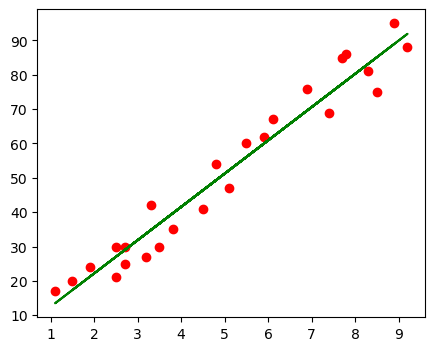

In [64]:
coefficient = lreg.coef_
intercept = lreg.intercept_

# Since, y = m*x + c
line = (Data['Hours'].values * coefficient) + intercept

plt.figure(figsize=(5,4))
plt.scatter(Data.Hours, Data.Scores, color='red')
plt.plot(Data.Hours, line, color= 'green')
plt.show()

#### **Preparing for prediction**

In [65]:
pred=lreg.predict(X_test)##predicting the Scores for test data
print(pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [66]:
# Comparing actual values to the predicted values

pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pred_compare

,Actual Values,Predicted Values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


#### **Evaluating the model**

##### The last step involves evaluating the algorithm's performance, which is crucial for comparing how effectively different algorithms work on a given dataset.

##### Here R2 score is the accuracy of the model

In [67]:
from sklearn import metrics

In [68]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994


##### R2 score or accuracy of the model is 96.78%

#### **Predicting the score**

##### What will be predicted score if a student study for 9.25 hrs in a day?

In [69]:
Prediction_score = lreg.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [92.38611528]


##### According to the model, the student will score 92.38611528 if studies for 9.25 hours.